Il numero di istanze sono: 17998
claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64
0    15182
1     2816
Name: fraud, dtype: int64


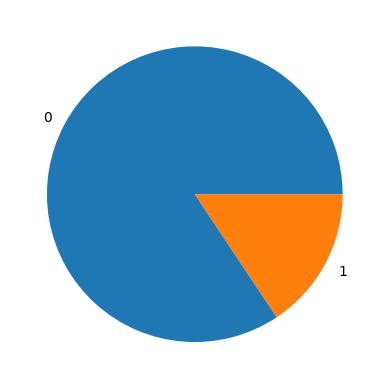

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('training_set_fd.csv', sep=';')
print(f'Il numero di istanze sono: {df.shape[0]}')
print(df.isna().sum())
print(df['fraud'].value_counts())

labels = df['fraud'].unique()
plt.pie(df['fraud'].value_counts(), labels=labels)
plt.show()

Ci sono alcuni valori nulli mentre le classi sono sbilanciate in favore dello 0

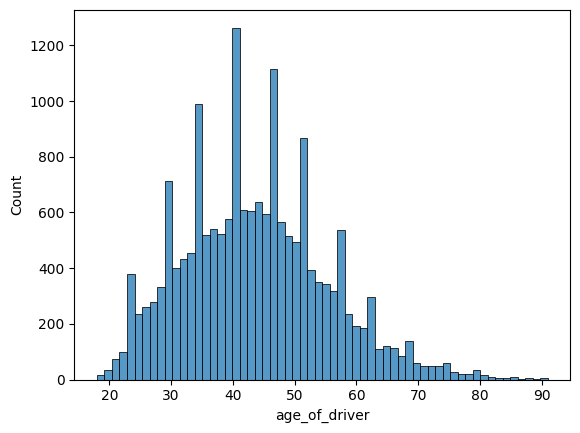

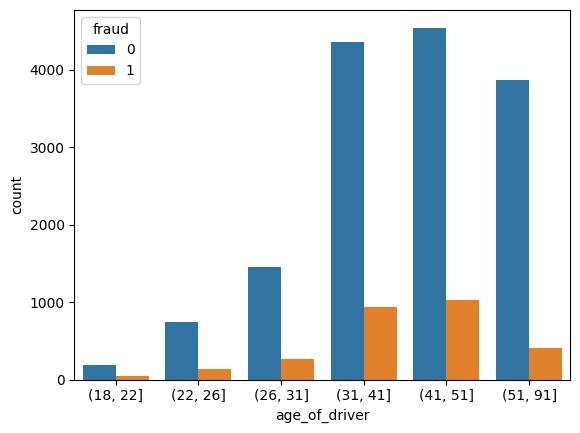

(18, 22]    0.014941
(22, 26]    0.046958
(26, 31]    0.095695
(31, 41]    0.331555
(41, 51]    0.366418
(51, 91]    0.144433
Name: age_of_driver, dtype: float64


In [17]:
import warnings
warnings.filterwarnings('ignore')
df_young = df[df['age_of_driver'] <= 91]
sns.histplot(df_young, x='age_of_driver')
plt.show()

df_young['age_of_driver'] = pd.cut(df_young['age_of_driver'], bins=[18,22,26,31,41,51,91])
sns.countplot(df_young, x='age_of_driver', hue='fraud')
plt.show()
df_young = df_young[df_young['fraud'] == 1]
print(df_young['age_of_driver'].value_counts(sort=False,normalize=True))

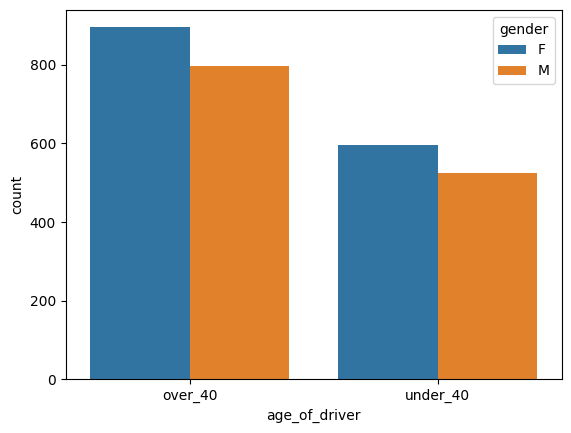

age_of_driver  gender
over_40        F         0.317827
               M         0.283381
under_40       F         0.212003
               M         0.186790
dtype: float64


In [18]:
import numpy as np

df_age = df.copy()
df_age = df_age[df_age['fraud'] == 1]
df_age['age_of_driver'] = np.where(df_age['age_of_driver'] < 40, 'under_40', 'over_40')

sns.countplot(df_age, x='age_of_driver', hue='gender')
plt.show()

print(df_age[['age_of_driver','gender']].value_counts(normalize=True))

Dal grafico risulta che le donne over 40 sono più soggette a frodi, questo risultato va cofrontato però con la percentuale di uomini rispetto quella delle donne per valutare effettivamente se i campioni sono bilanciati, il risultato è che le donne sono presenti in percentuali leggermente maggiori. La fascia over 40 comunque è quella più soggetta a frodi delle due

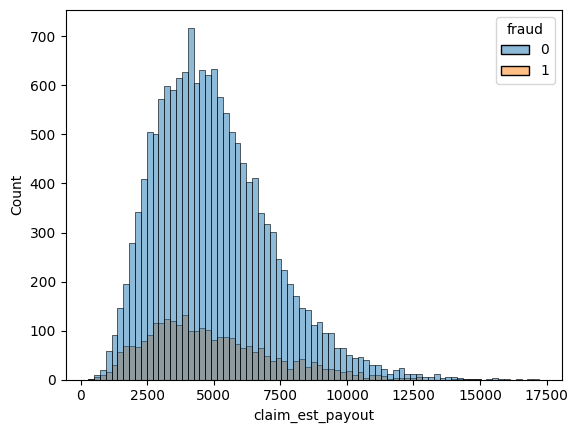

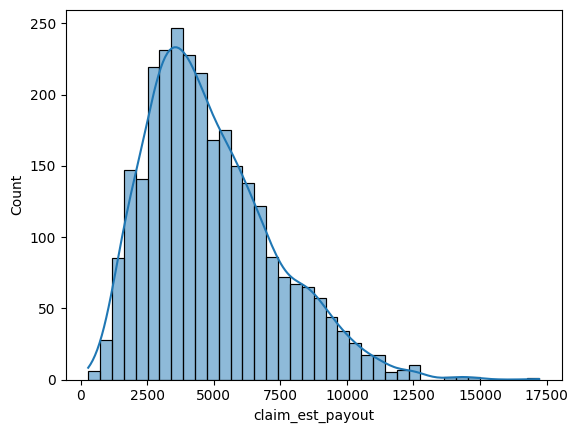

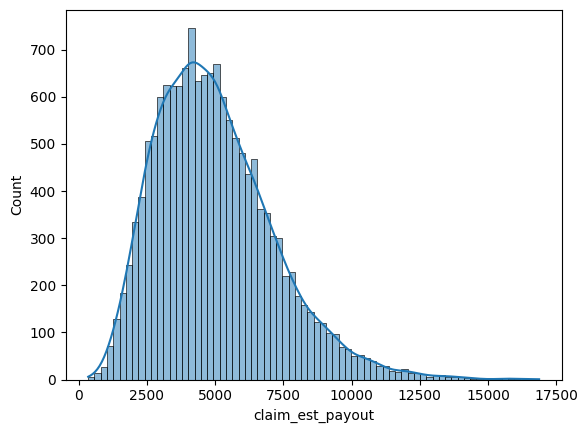

In [19]:
sns.histplot(df, x='claim_est_payout', hue='fraud')
plt.show()
sns.histplot(df[df['fraud'] == 1], x='claim_est_payout', kde=True)
plt.show()
sns.histplot(df[df['fraud'] == 0], x='claim_est_payout', kde=True)
plt.show()

Non sembra esserci un evidente correlazione tra l'aumento della somma da pagare e il numero di frodi

Predizione decision tree Test: 0.7312186978297162 Train: 1.0
Predizione logistic regression Test: 0.8437395659432387 Train: 0.8432960427450326


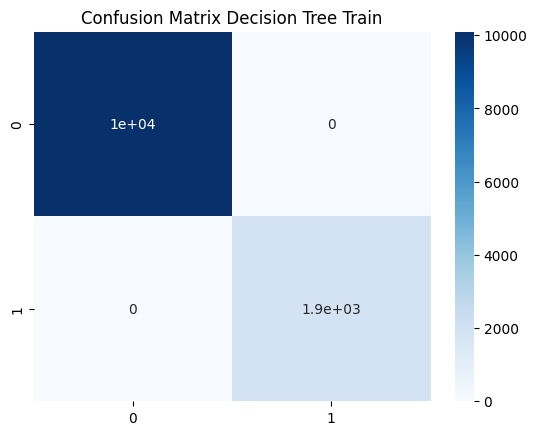

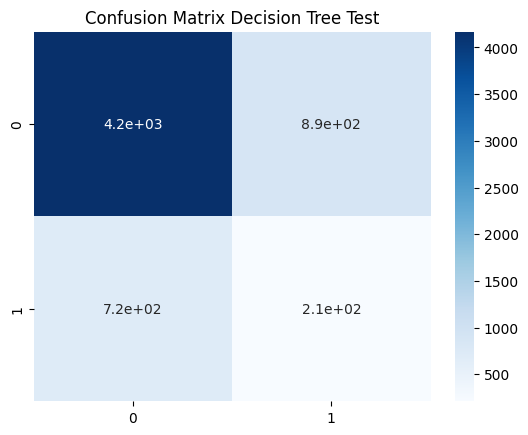

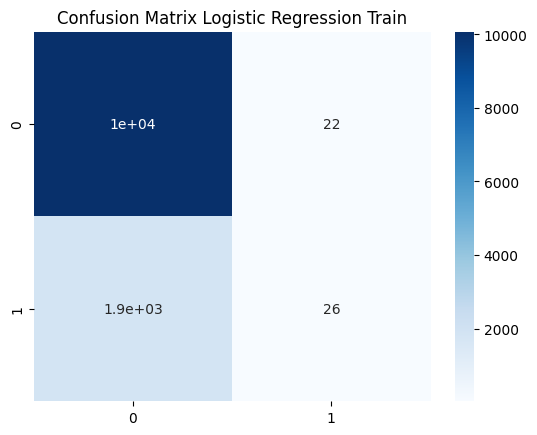

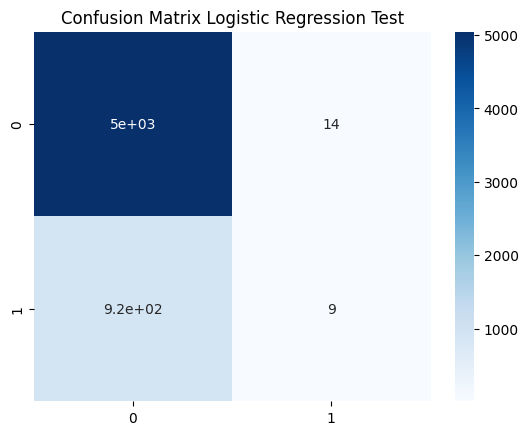

Predizione Dummy Classifier Test: 0.8445742904841402 Train: 0.84296209717816


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier

df = pd.read_csv('training_set_fd.csv', sep=';')
df.drop('claim_number', axis=1, inplace=True)
df.dropna(inplace=True)

enc = OrdinalEncoder()
temp = enc.fit_transform(df)
df = pd.DataFrame(temp, columns=enc.get_feature_names_out())

y = df['fraud']
X = df.drop('fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3, random_state=0)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

test_pred1 = logreg.predict(X_test)
train_pred1 = logreg.predict(X_train)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')

sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Test')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Test')
plt.show()

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione Dummy Classifier Test: {accuracy_score(y_test, test_pred2)} Train: {accuracy_score(y_train, train_pred2)}')

Essendo le classi sbilanciate sarebbe meglio utilizzare un'altra metrica invece che l'accuracy ad esempio si potrebbe utilizzare la recall o la precision, in questo caso vediamo come il decision tree overfitta nella fase di training e che il dummy classifier ha un'accuracy pari alla logistic regression e addirittura superiore al decision tree, questo è proprio a causa delle classi sbilanciate

In [21]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=10, scoring='recall').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logreg, X, y, cv=10, scoring='recall').mean())
print('Accuracy Decision Tree con Cross Val ',cross_val_score(dummy, X, y, cv=10, scoring='recall').mean())

Accuracy Decision Tree con Cross Val  0.2364768683274021
Accuracy Logistic Regression con Cross Val  0.009951793240958077
Accuracy Decision Tree con Cross Val  0.0


In [22]:

from sklearn.model_selection import GridSearchCV

param = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [1,1.5,2,2.5]
}

gs = GridSearchCV(logreg, param_grid=param, scoring='recall')
gs.fit(X_train,y_train)

test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs.best_params_)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

{'C': 1.5, 'penalty': 'l2'}
Predizione logistic regression Test: 0.8435726210350585 Train: 0.8431290699615963


In [30]:
from sklearn.preprocessing import MaxAbsScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

discr = KBinsDiscretizer(n_bins=20, encode='ordinal')

df_bin = df.copy()
df_bin['claim_est_payout'] = discr.fit_transform(df['claim_est_payout'].values.reshape(-1,1))
df_bin['vehicle_price'] = discr.fit_transform(df['vehicle_price'].values.reshape(-1,1))

scaler = MaxAbsScaler()

temp = scaler.fit_transform(X)
df_bin = pd.DataFrame(temp, columns=scaler.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(df_bin, y , test_size=1/3, random_state=0)

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

logreg.fit(X_train, y_train)

test_pred1 = logreg.predict(X_test)
train_pred1 = logreg.predict(X_train)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')

   age_of_driver  gender  marital_status  annual_income  high_education_ind  \
0       0.325581     1.0             1.0       0.502604                 1.0   
1       0.034884     0.0             0.0       0.021205                 0.0   
2       0.360465     0.0             0.0       0.557292                 0.0   
3       0.465116     0.0             1.0       0.720982                 1.0   
4       0.232558     1.0             1.0       0.336682                 1.0   

   address_change_ind  living_status  claim_day_of_week  accident_site  \
0                 1.0            1.0           0.000000            0.5   
1                 1.0            1.0           0.666667            0.0   
2                 1.0            0.0           0.833333            0.5   
3                 0.0            0.0           0.666667            0.5   
4                 0.0            1.0           0.833333            0.0   

   past_num_of_claims  channel  claim_est_payout  age_of_vehicle  \
0           

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

ct = ColumnTransformer(transformers=[
    ('discr2', KBinsDiscretizer(n_bins=10), ['claim_est_payout','vehicle_price'])
])

prepo = Pipeline(steps=[
    ('ct', ct),
    ('norm', Normalizer())
])

prepo.fit(X,y)

pipe = Pipeline(steps=[
    ('prepo', prepo),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train,y_train)
test_pred = pipe.predict(X_test)

print('Accuracy logistic regression on test:' , accuracy_score(y_test, test_pred))

Accuracy logistic regression on test: 0.8445742904841402


In [25]:
from sklearn.feature_selection import SelectKBest

logistic = LogisticRegression()

pipe = Pipeline(steps=[
    ("k_best", SelectKBest()),
    ("bin", KBinsDiscretizer()),
    ("maxabs", MaxAbsScaler()),
    ("logistic", logistic)
])

param_grid = {
    "k_best__k": [2, 4, 5, 7, 10],
    "bin__n_bins": [2, 3, 4, 5, 6, 7]
}

search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best = search.best_params_
pipe.set_params(**best)

pipe.fit(X_train, y_train)


test_pred = pipe.predict(X_test)

print('Accuracy logistic test:' , accuracy_score(y_test, test_pred))

Best parameter (CV score=0.843):
{'bin__n_bins': 2, 'k_best__k': 2}
Accuracy logistic test: 0.8445742904841402
